 Model saved: Decision Tree
 Model saved: KNN
 Model saved: Naïve Bayes

✅ All models trained and saved successfully!


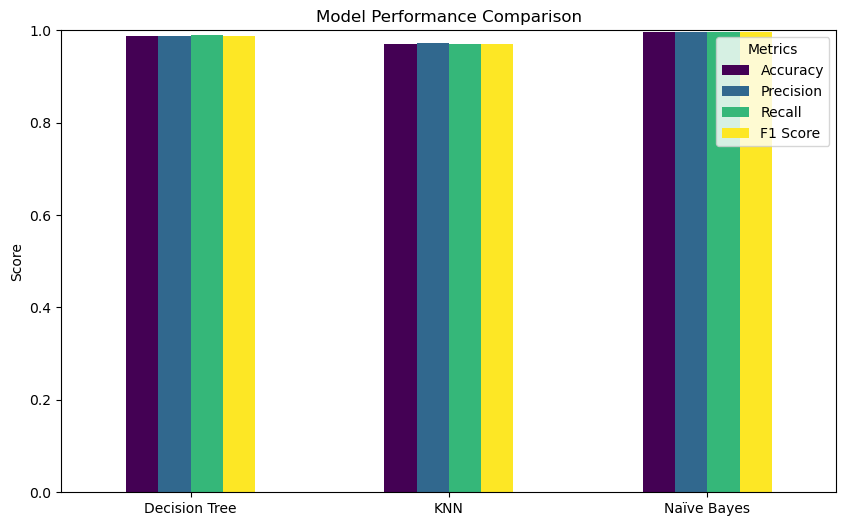


=== Summary Table ===
               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.988636   0.987734  0.989451  0.988352
KNN            0.970455   0.971934  0.971091  0.969533
Naïve Bayes    0.995455   0.996364  0.995215  0.995581
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19


In [ ]:
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset
df = pd.read_csv("dataset/crop_data.csv")  # Ensure the dataset exists

# Features and target
X = df.drop(columns=["label"])  # Assuming 'label' is the target crop
y = df["label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB(),
}

metrics = {}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store accuracy in dictionary
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": np.mean([v["precision"] for k, v in report.items() if k not in ["accuracy", "macro avg", "weighted avg"]]),
        "Recall": np.mean([v["recall"] for k, v in report.items() if k not in ["accuracy", "macro avg", "weighted avg"]]),
        "F1 Score": np.mean([v["f1-score"] for k, v in report.items() if k not in ["accuracy", "macro avg", "weighted avg"]]),
    }

    # Save trained model
    with open(f"models/{name.lower().replace(' ', '_')}.pkl", "wb") as f:
        pickle.dump(model, f)

    print(f" Model saved: {name}")

# Save metrics to JSON file for Flask app
with open("models/accuracies.json", "w") as f:
    json.dump(metrics, f)

print("\n All models trained and saved successfully!")

# Plot Metrics
metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

# Print summary table
print("\n=== Summary Table ===")
print(metrics_df)

report = classification_report(y_test, y_pred)
print(report)